## House Price Prediction : Develop a machine learning model for predicting house prices using Python, scikit-learn, and TensorFlow.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('Housing.csv')

# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(data.head())

# Handle missing values (if any)
data = data.dropna()

# Encode categorical features
data = pd.get_dummies(data, drop_first=True)

# Split the data into features and target
X = data.drop('price', axis=1)
y = data['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Data preprocessing completed.")


First few rows of the dataset:
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
Data preprocessing completed.


Summary statistics of the dataset:
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


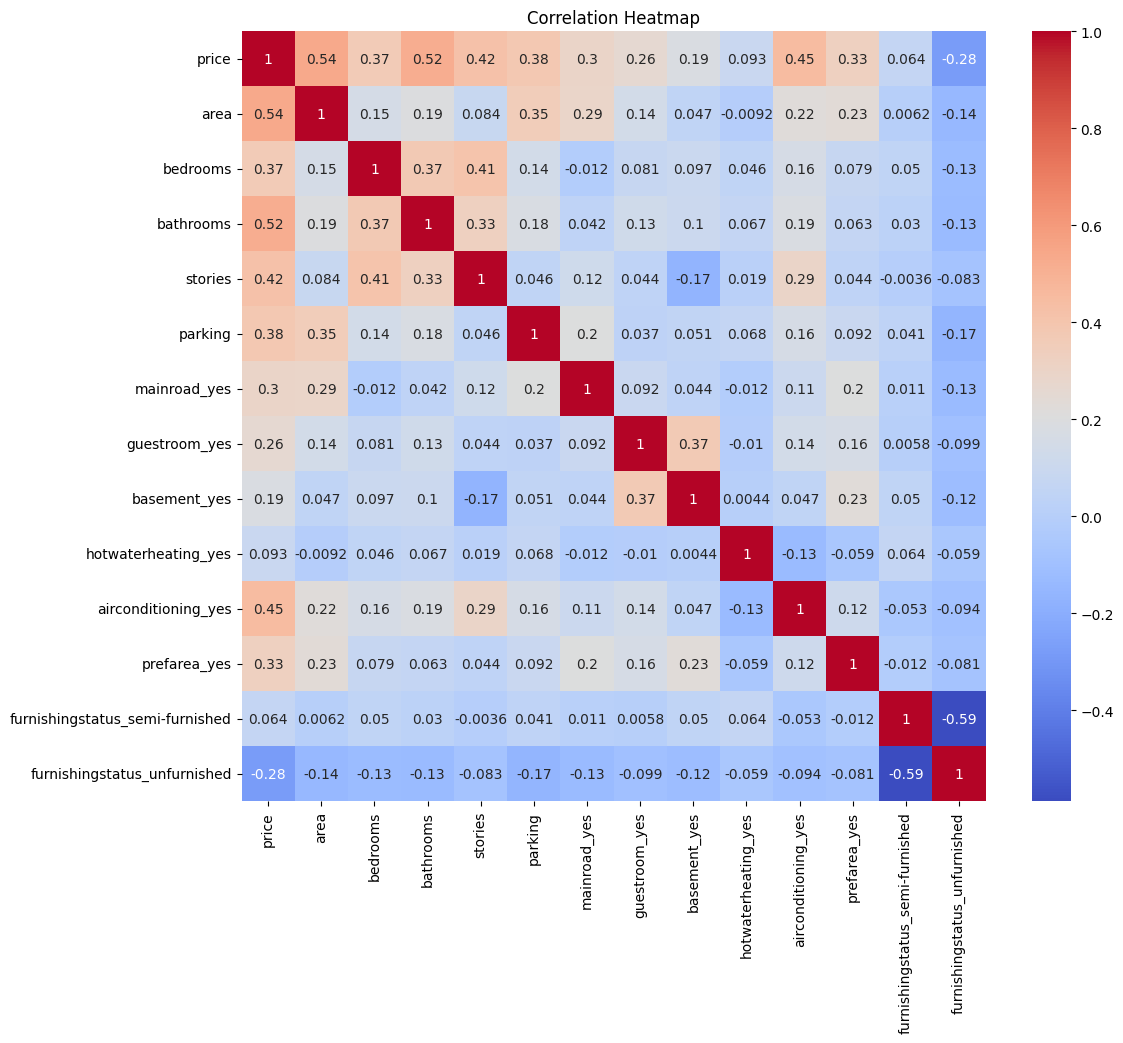

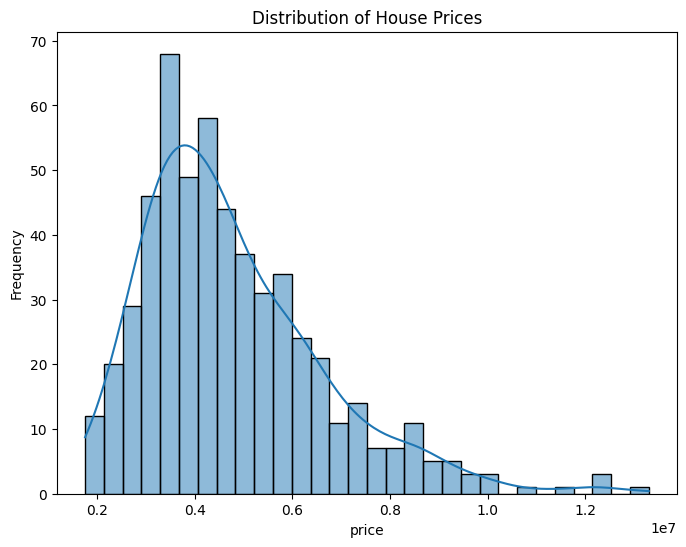

Exploratory data analysis completed.


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics of the dataset
print("Summary statistics of the dataset:")
print(data.describe())

# Correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Distribution of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(data['price'], bins=30, kde=True)
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()

print("Exploratory data analysis completed.")


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the linear regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_train = lr_model.predict(X_train)
y_pred_test = lr_model.predict(X_test)

# Evaluate the model
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

print(f"Linear Regression - Training MSE: {mse_train}")
print(f"Linear Regression - Testing MSE: {mse_test}")
print(f"Linear Regression - Training R^2: {r2_train}")
print(f"Linear Regression - Testing R^2: {r2_test}")


Linear Regression - Training MSE: 968358188440.7242
Linear Regression - Testing MSE: 1754318687330.6677
Linear Regression - Training R^2: 0.6859438988560158
Linear Regression - Testing R^2: 0.6529242642153177


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the neural network model
nn_model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
nn_model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = nn_model.fit(X_train, y_train, validation_split=0.2, epochs=100, batch_size=32, verbose=1)

# Evaluate the model
nn_mse, nn_mae = nn_model.evaluate(X_test, y_test, verbose=0)
print(f"Neural Network - Test MSE: {nn_mse}")
print(f"Neural Network - Test MAE: {nn_mae}")


Epoch 1/100
11/11 [==============================] - 2s 31ms/step - loss: 25349383520256.0000 - mae: 4727421.5000 - val_loss: 24781592199168.0000 - val_mae: 4623896.5000
Epoch 2/100
11/11 [==============================] - 0s 8ms/step - loss: 25349379325952.0000 - mae: 4727420.5000 - val_loss: 24781583810560.0000 - val_mae: 4623896.0000
Epoch 3/100
11/11 [==============================] - 0s 8ms/step - loss: 25349368840192.0000 - mae: 4727420.0000 - val_loss: 24781571227648.0000 - val_mae: 4623895.0000
Epoch 4/100
11/11 [==============================] - 0s 9ms/step - loss: 25349356257280.0000 - mae: 4727418.5000 - val_loss: 24781556547584.0000 - val_mae: 4623893.5000
Epoch 5/100
11/11 [==============================] - 0s 6ms/step - loss: 25349337382912.0000 - mae: 4727417.5000 - val_loss: 24781539770368.0000 - val_mae: 4623891.5000
Epoch 6/100
11/11 [==============================] - 0s 7ms/step - loss: 25349320605696.0000 - mae: 4727415.0000 - val_loss: 24781516701696.0000 - val_mae